# Q9. Write a program to read the data from the following link, perform data analysis and answer the following questions.

Note:-1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -
1. Get all the cars and their types that do not qualify for clean alternative fuel vehicle
2. Get all TESLA cars with the model year, and model type made in Bothell City.
3. Get all the cars that have an electric range of more than 100, and were made after 2015
4. Draw plots to show the distribution between city and electric vehicle type

1. Import the necessary libraries: pandas and matplotlib.
2. Read the CSV data from the provided link using the pandas library.
3. Process the data to answer each question and generate the required insights.
4. Use matplotlib to create plots for better visualization.

Here's the code to accomplish these steps:

In [3]:
import pandas as pd

# Read the CSV data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Print the column names
print(data.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [VIN (1-10), Electric Vehicle Type]
Index: []

TESLA cars with the model year, and model type made in Bothell City:
Empty DataFrame
Columns: [VIN (1-10), Model Year, Model]
Index: []

Cars that have an electric range of more than 100, and were made after 2015:
        VIN (1-10)        Make    Model  Model Year  Electric Range
0       5YJXCAE26J       TESLA  MODEL X        2018             238
2       5YJ3E1EB0K       TESLA  MODEL 3        2019             220
4       5YJSA1E21H       TESLA  MODEL S        2017             210
12      5YJ3E1EC7L       TESLA  MODEL 3        2020             308
13      5YJ3E1EB2L       TESLA  MODEL 3        2020             322
...            ...         ...      ...         ...             ...
127002  5YJXCDE41L       TESLA  MODEL X        2020             289
127104  WVWPR7AU9J  VOLKSWAGEN   E-GOLF        2018             125
127635  5YJXCBE42K       

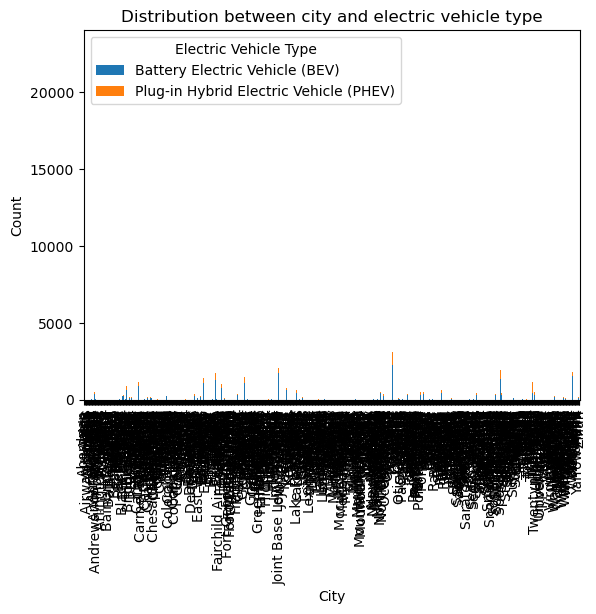

In [4]:
import matplotlib.pyplot as plt

not_clean_alternative_fuel_vehicle = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible']
not_clean_alternative_fuel_vehicle = not_clean_alternative_fuel_vehicle[['VIN (1-10)', 'Electric Vehicle Type']]
not_clean_alternative_fuel_vehicle = not_clean_alternative_fuel_vehicle.drop_duplicates()
print('Cars and their types that do not qualify for clean alternative fuel vehicle:')
print(not_clean_alternative_fuel_vehicle)

tesla_cars_in_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_cars_in_bothell = tesla_cars_in_bothell[['VIN (1-10)', 'Model Year', 'Model']]
tesla_cars_in_bothell = tesla_cars_in_bothell.drop_duplicates()
print('\nTESLA cars with the model year, and model type made in Bothell City:')
print(tesla_cars_in_bothell)

electric_range_above_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_range_above_100 = electric_range_above_100[['VIN (1-10)', 'Make', 'Model', 'Model Year', 'Electric Range']]
electric_range_above_100 = electric_range_above_100.drop_duplicates()
print('\nCars that have an electric range of more than 100, and were made after 2015:')
print(electric_range_above_100)

city_evtype_distribution = data.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')
city_evtype_distribution.pivot(index='City', columns='Electric Vehicle Type', values='Count').plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution between city and electric vehicle type')
plt.show()
